In [77]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF

from sklearn.datasets import load_iris, load_boston, load_breast_cancer, load_digits
from sklearn.datasets import make_circles, make_blobs

from sklearn.manifold import TSNE

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
iris = load_iris()
X, y = (iris.data, iris.target)

In [8]:
clf = LogisticRegression(max_iter = 1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [10]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
def score(est, X, y, label = None):
    print(est.__class__.__name__, f'{label}:\t', est.score(X, y))

In [12]:
score(clf, X_train, y_train, 'Train')
score(clf, X_test, y_test, 'Test')

LogisticRegression Train:	 0.9821428571428571
LogisticRegression Test:	 0.9736842105263158


In [50]:
print(confusion_matrix(y_test, clf.predict(X_test)))
print(np.unique(y_test, return_counts = True)[1])

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
[13 16  9]


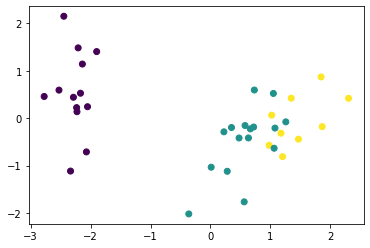

In [51]:
ss = StandardScaler().fit(X)
pca2 = PCA(2).fit(ss.transform(X))

plt.scatter(pca2.transform(ss.transform(X_test))[:, 0], pca2.transform(ss.transform(X_test))[:, 1], c = y_test)
plt.show()

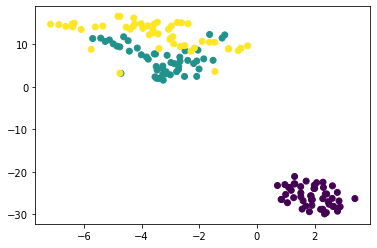

In [52]:
XX = TSNE().fit_transform(ss.transform(X))
plt.scatter(XX[:, 0], XX[:, 1], c = y)
plt.show()

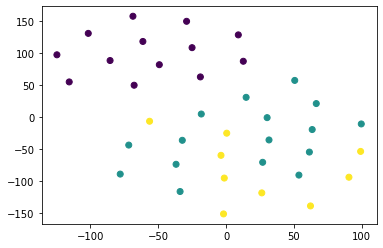

In [53]:
XX = TSNE().fit_transform(ss.transform(X_test))
plt.scatter(XX[:, 0], XX[:, 1], c = y_test)
plt.show()

In [54]:
from sklearn.metrics import f1_score

print(f1_score(y_test, clf.predict(X_test)))

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

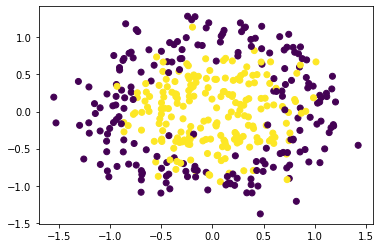

In [85]:
X, y = make_circles(n_samples = 400, noise = 0.2, factor = 0.5)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [87]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
lor = LogisticRegression().fit(X_train, y_train)
svc = SVC().fit(X_train, y_train)
ran = RandomForestClassifier().fit(X_train, y_train)
clfs = [tree, lor, svc, ran]

In [140]:
for clf in clfs:
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__)
    print(np.unique(y_test, return_counts = True)[1])
    print(confusion_matrix(y_test, y_pred))

DecisionTreeClassifier
[55 45]
[[41 14]
 [ 6 39]]
LogisticRegression
[55 45]
[[14 41]
 [ 4 41]]
SVC
[55 45]
[[46  9]
 [ 4 41]]
RandomForestClassifier
[55 45]
[[46  9]
 [ 5 40]]


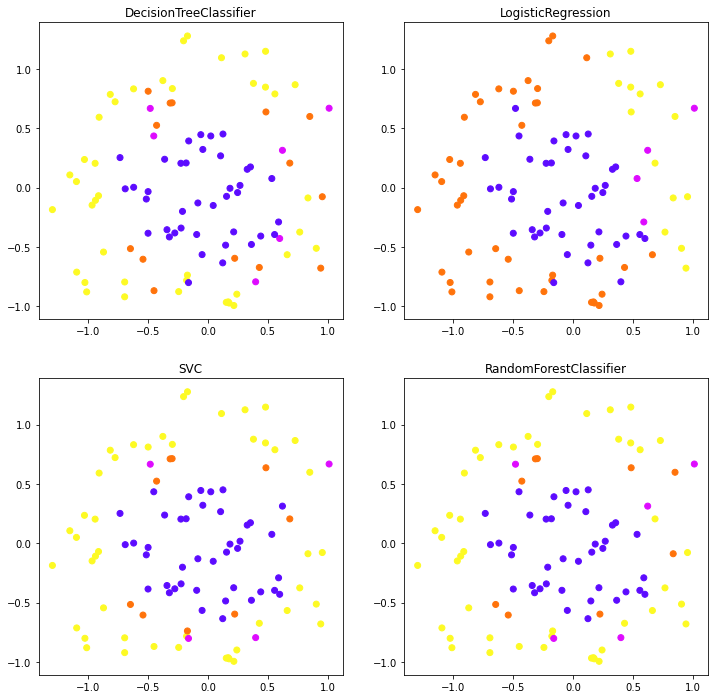

In [141]:
fig, axes = plt.subplots(2, 2, figsize = (12, 12))

for clf, ax in zip(clfs, axes.ravel()):
    y_pred = clf.predict(X_test)
    yy = []
    for i in range(len(y_test)):
        if y_test[i] == 0 and y_pred[i] == 0:
            yy.append('#FDFA24') # yellow for TN
        elif y_test[i] == 0 and y_pred[i] == 1:
            yy.append('#FF730B') # orange for FP
        elif y_test[i] == 1 and y_pred[i] == 1:
            yy.append('#5C0BFF') # violet for TP
        elif y_test[i] == 1 and y_pred[i] == 0:
            yy.append('#DE0BFF') # pink for FN
    scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c = yy)
    ax.set_title(clf.__class__.__name__)
    
plt.show()

In [125]:
from sklearn.metrics import f1_score

for clf in clfs:
    print("{:<30} f1_score:\t{}".format(clf.__class__.__name__, f1_score(y_test, clf.predict(X_test))))

DecisionTreeClassifier         f1_score:	0.7959183673469387
LogisticRegression             f1_score:	0.6456692913385828
SVC                            f1_score:	0.8631578947368421
RandomForestClassifier         f1_score:	0.851063829787234


In [130]:
from sklearn.metrics import classification_report

for clf in clfs:
    print(clf.__class__.__name__,'\n',classification_report(y_test, clf.predict(X_test)),'\n')

DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.87      0.75      0.80        55
           1       0.74      0.87      0.80        45

    accuracy                           0.80       100
   macro avg       0.80      0.81      0.80       100
weighted avg       0.81      0.80      0.80       100
 

LogisticRegression 
               precision    recall  f1-score   support

           0       0.78      0.25      0.38        55
           1       0.50      0.91      0.65        45

    accuracy                           0.55       100
   macro avg       0.64      0.58      0.51       100
weighted avg       0.65      0.55      0.50       100
 

SVC 
               precision    recall  f1-score   support

           0       0.92      0.84      0.88        55
           1       0.82      0.91      0.86        45

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg      

In [155]:
for clf in clfs:
    print('\n', clf.__class__.__name__)
    if hasattr(clf, 'predict_proba') and hasattr(clf, 'decision_function'):
        print(clf.predict_proba(X_test[:5]))
        print(clf.decision_function(X_test[:5]).reshape(-1, 1))
    elif hasattr(clf, 'decision_function'):
        print(clf.decision_function(X_test[:5]).reshape(-1, 1))
    elif hasattr(clf, 'predict_proba'):
        print(clf.predict_proba(X_test[:5]))
    else:
        print('Neither func works')


 DecisionTreeClassifier
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]

 LogisticRegression
[[0.49703834 0.50296166]
 [0.50237931 0.49762069]
 [0.50889641 0.49110359]
 [0.48093506 0.51906494]
 [0.47653878 0.52346122]]
[[ 0.01184677]
 [-0.00951729]
 [-0.0355894 ]
 [ 0.07629677]
 [ 0.09391386]]

 SVC
[[ 2.05375972]
 [ 1.32937381]
 [-0.60596207]
 [ 1.98834515]
 [ 2.49320358]]

 RandomForestClassifier
[[0.   1.  ]
 [0.3  0.7 ]
 [0.68 0.32]
 [0.06 0.94]
 [0.   1.  ]]


In [159]:
from sklearn.metrics import classification_report

for clf in clfs:
    if hasattr(clf, 'predict_proba'):
        name = clf.__class__.__name__
        y_conf = clf.predict_proba(X_test)[:, 1] > 0.5
        report = classification_report(y_test, y_conf)
        print(name, '\n', report, '\n')

DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.87      0.75      0.80        55
           1       0.74      0.87      0.80        45

    accuracy                           0.80       100
   macro avg       0.80      0.81      0.80       100
weighted avg       0.81      0.80      0.80       100
 

LogisticRegression 
               precision    recall  f1-score   support

           0       0.78      0.25      0.38        55
           1       0.50      0.91      0.65        45

    accuracy                           0.55       100
   macro avg       0.64      0.58      0.51       100
weighted avg       0.65      0.55      0.50       100
 

RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        55
           1       0.82      0.89      0.85        45

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100

In [169]:
from sklearn.metrics import classification_report

for clf in clfs:
    if hasattr(clf, 'predict_proba'):
        name = clf.__class__.__name__
        y_conf = clf.predict_proba(X_test)[:, 1] > 0.9
        report = classification_report(y_test, y_conf)
        print(name, '\n', report, '\n')

DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.87      0.75      0.80        55
           1       0.74      0.87      0.80        45

    accuracy                           0.80       100
   macro avg       0.80      0.81      0.80       100
weighted avg       0.81      0.80      0.80       100
 

LogisticRegression 
               precision    recall  f1-score   support

           0       0.55      1.00      0.71        55
           1       0.00      0.00      0.00        45

    accuracy                           0.55       100
   macro avg       0.28      0.50      0.35       100
weighted avg       0.30      0.55      0.39       100
 

RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.78      0.98      0.87        55
           1       0.97      0.67      0.79        45

    accuracy                           0.84       100
   macro avg       0.88      0.82      0.83       100

/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
from sklearn.metrics import classification_report

for clf in clfs:
    if hasattr(clf, 'predict_proba'):
        name = clf.__class__.__name__
        y_conf = clf.predict_proba(X_test)[:, 1] > 0.1
        report = classification_report(y_test, y_conf)
        print(name, '\n', report, '\n')

DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.87      0.75      0.80        55
           1       0.74      0.87      0.80        45

    accuracy                           0.80       100
   macro avg       0.80      0.81      0.80       100
weighted avg       0.81      0.80      0.80       100
 

LogisticRegression 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.45      1.00      0.62        45

    accuracy                           0.45       100
   macro avg       0.23      0.50      0.31       100
weighted avg       0.20      0.45      0.28       100
 

RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.94      0.31      0.47        55
           1       0.54      0.98      0.69        45

    accuracy                           0.61       100
   macro avg       0.74      0.64      0.58       100

/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
from sklearn.metrics import classification_report

conf_points = np.linspace(0.1, 0.9, 4)

for conf in conf_points:
    clf = ran
    name = clf.__class__.__name__
    y_conf = clf.predict_proba(X_test)[:, 1] > conf
    report = classification_report(y_test, y_conf)
    print('RFC Conf: {:.2f}'.format(conf))
    print(report)

RFC Conf: 0.10
              precision    recall  f1-score   support

           0       0.94      0.31      0.47        55
           1       0.54      0.98      0.69        45

    accuracy                           0.61       100
   macro avg       0.74      0.64      0.58       100
weighted avg       0.76      0.61      0.57       100

RFC Conf: 0.37
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        55
           1       0.73      0.89      0.80        45

    accuracy                           0.80       100
   macro avg       0.81      0.81      0.80       100
weighted avg       0.82      0.80      0.80       100

RFC Conf: 0.63
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        55
           1       0.89      0.89      0.89        45

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      

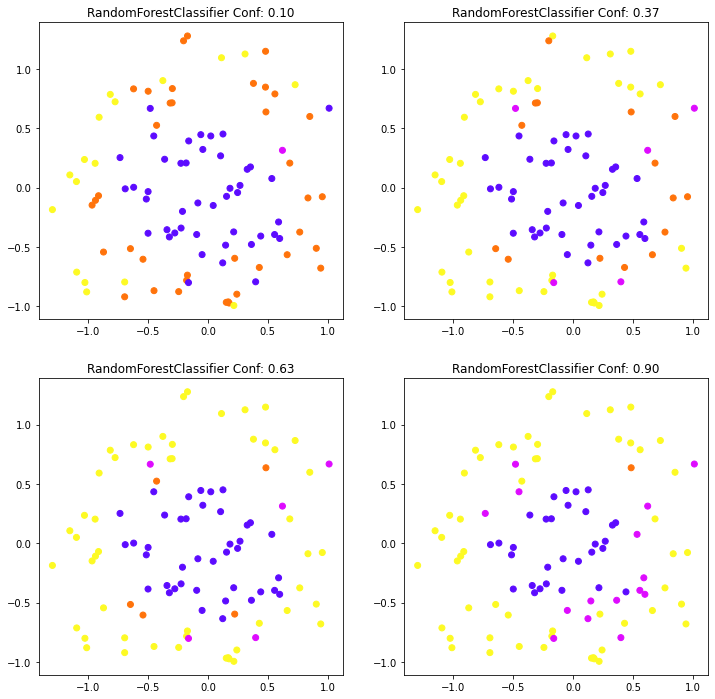

In [177]:
fig, axes = plt.subplots(2, 2, figsize = (12, 12))

conf_points = np.linspace(0.1, 0.9, 4)

for conf, ax in zip(conf_points, axes.ravel()):
    clf = ran
    y_pred = clf.predict_proba(X_test)[:, 1] > conf
    yy = []
    for i in range(len(y_test)):
        if y_test[i] == 0 and y_pred[i] == 0:
            yy.append('#FDFA24')
        elif y_test[i] == 0 and y_pred[i] == 1:
            yy.append('#FF730B')
        elif y_test[i] == 1 and y_pred[i] == 1:
            yy.append('#5C0BFF')
        elif y_test[i] == 1 and y_pred[i] == 0:
            yy.append('#DE0BFF')
    scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c = yy)
    ax.set_title('{} Conf: {:.2f}'.format(clf.__class__.__name__, conf))
    
plt.show()

In [244]:
from sklearn.metrics import precision_recall_curve

clf = ran

precision, recall, thresholds = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
print(precision.shape)
print(recall.shape)
print(thresholds.shape)

(49,)
(49,)
(48,)


In [245]:
tuples = list(zip(thresholds, precision))
print('\n'.join([str(tup) for tup in tuples]))

(0.09, 0.5172413793103449)
(0.1, 0.5116279069767442)
(0.13, 0.5365853658536586)
(0.14, 0.5512820512820513)
(0.15, 0.5526315789473685)
(0.17, 0.56)
(0.2, 0.5616438356164384)
(0.21, 0.5857142857142857)
(0.22, 0.6029411764705882)
(0.24, 0.6119402985074627)
(0.26, 0.6212121212121212)
(0.27, 0.640625)
(0.28, 0.6612903225806451)
(0.29, 0.6557377049180327)
(0.32, 0.6666666666666666)
(0.33, 0.6779661016949152)
(0.35, 0.6896551724137931)
(0.36, 0.7017543859649122)
(0.38, 0.7272727272727273)
(0.39, 0.7407407407407407)
(0.43, 0.7547169811320755)
(0.45, 0.7692307692307693)
(0.47, 0.7843137254901961)
(0.51, 0.8163265306122449)
(0.52, 0.8333333333333334)
(0.53, 0.851063829787234)
(0.57, 0.8695652173913043)
(0.65, 0.8888888888888888)
(0.69, 0.8863636363636364)
(0.7, 0.8837209302325582)
(0.71, 0.9024390243902439)
(0.72, 0.925)
(0.76, 0.9230769230769231)
(0.8, 0.9473684210526315)
(0.81, 0.9444444444444444)
(0.84, 0.9428571428571428)
(0.85, 0.9411764705882353)
(0.89, 0.9393939393939394)
(0.91, 0.9677419

In [246]:
tuples = list(zip(thresholds, recall))
print('\n'.join([str(tup) for tup in tuples]))

(0.09, 1.0)
(0.1, 0.9777777777777777)
(0.13, 0.9777777777777777)
(0.14, 0.9555555555555556)
(0.15, 0.9333333333333333)
(0.17, 0.9333333333333333)
(0.2, 0.9111111111111111)
(0.21, 0.9111111111111111)
(0.22, 0.9111111111111111)
(0.24, 0.9111111111111111)
(0.26, 0.9111111111111111)
(0.27, 0.9111111111111111)
(0.28, 0.9111111111111111)
(0.29, 0.8888888888888888)
(0.32, 0.8888888888888888)
(0.33, 0.8888888888888888)
(0.35, 0.8888888888888888)
(0.36, 0.8888888888888888)
(0.38, 0.8888888888888888)
(0.39, 0.8888888888888888)
(0.43, 0.8888888888888888)
(0.45, 0.8888888888888888)
(0.47, 0.8888888888888888)
(0.51, 0.8888888888888888)
(0.52, 0.8888888888888888)
(0.53, 0.8888888888888888)
(0.57, 0.8888888888888888)
(0.65, 0.8888888888888888)
(0.69, 0.8666666666666667)
(0.7, 0.8444444444444444)
(0.71, 0.8222222222222222)
(0.72, 0.8222222222222222)
(0.76, 0.8)
(0.8, 0.8)
(0.81, 0.7555555555555555)
(0.84, 0.7333333333333333)
(0.85, 0.7111111111111111)
(0.89, 0.6888888888888889)
(0.91, 0.66666666666666

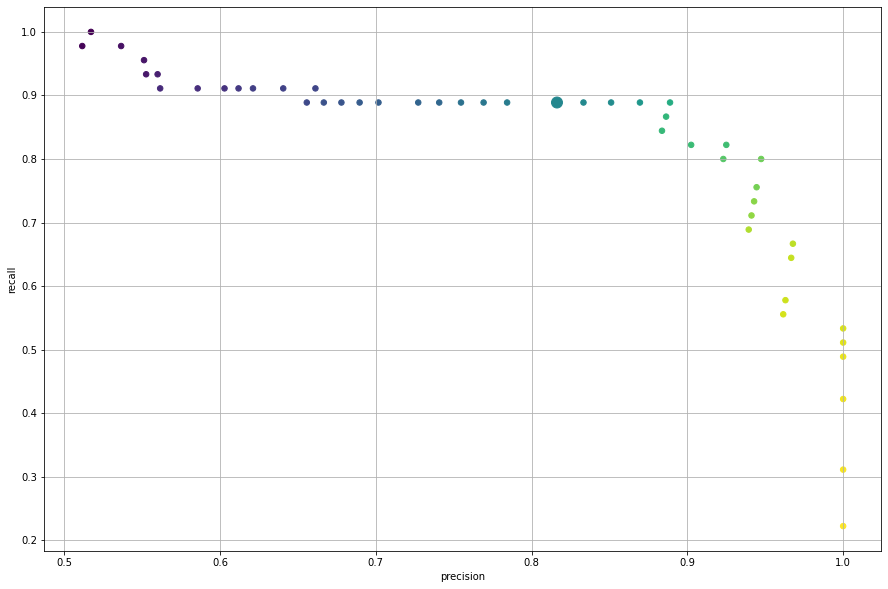

In [247]:
plt.figure(figsize = (15, 10))
plt.scatter(precision[:-1], recall[:-1], c = thresholds, s = 30 + 90 * (thresholds == 0.51))
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.show()

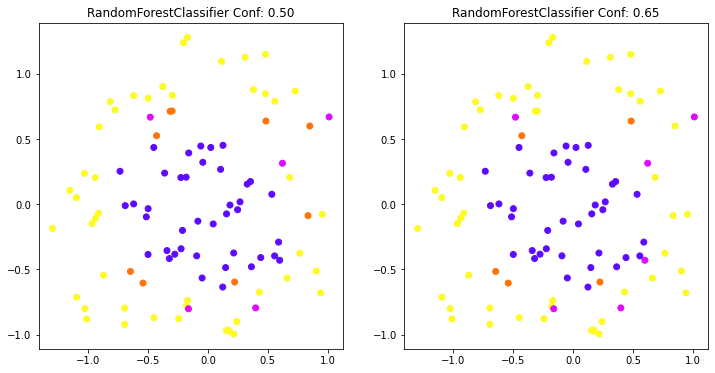

In [248]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

conf_points = [0.5, 0.65]

for conf, ax in zip(conf_points, axes.ravel()):
    clf = ran
    y_pred = clf.predict_proba(X_test)[:, 1] > conf
    yy = []
    for i in range(len(y_test)):
        if y_test[i] == 0 and y_pred[i] == 0:
            yy.append('#FDFA24')
        elif y_test[i] == 0 and y_pred[i] == 1:
            yy.append('#FF730B')
        elif y_test[i] == 1 and y_pred[i] == 1:
            yy.append('#5C0BFF')
        elif y_test[i] == 1 and y_pred[i] == 0:
            yy.append('#DE0BFF')
    scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c = yy)
    ax.set_title('{} Conf: {:.2f}'.format(clf.__class__.__name__, conf))
    
plt.show()

In [262]:
conf_points = [0.5, 0.65]
clf = ran

for conf in conf_points:
    score = np.mean((ran.predict_proba(X_test) > conf)[:, 1] == y_test)
    print('{} Conf: {:.2f}'.format(clf.__class__.__name__, conf))
    print('Score: \t{}\n'.format(score))

RandomForestClassifier Conf: 0.50
Score: 	0.86

RandomForestClassifier Conf: 0.65
Score: 	0.89



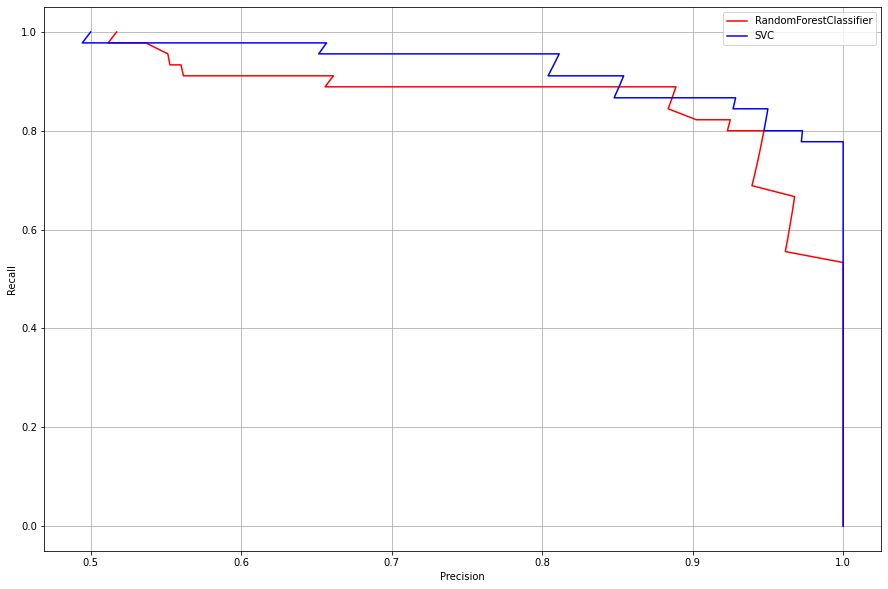

In [277]:
plt.figure(figsize = (15, 10))

for clf, color in zip([ran, svc], ['red', 'blue']):
    if hasattr(clf, 'decision_function'):
        precision, recall, threshold = precision_recall_curve(y_test, clf.decision_function(X_test))
    elif hasattr(clf, 'predict_proba'):
        precision, recall, threshold = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
    plt.plot(precision, recall, color = color, label = clf.__class__.__name__)

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()
plt.grid()
plt.show()

In [282]:
from sklearn.metrics import average_precision_score

print(average_precision_score(y_test, ran.predict_proba(X_test)[:, 1]))
print(average_precision_score(y_test, svc.decision_function(X_test)))

0.93033832830858
0.9618049406007998


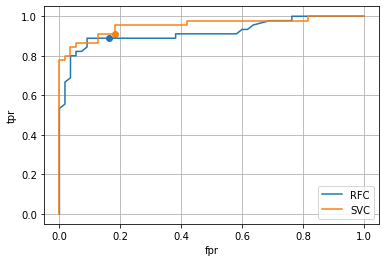

In [301]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, ran.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label = 'RFC')
plt.scatter([fpr[thresholds == 0.51]], [tpr[thresholds == 0.51]])
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label = 'SVC')
plt.scatter([fpr[np.round(thresholds, 1) == 0.0]], [tpr[np.round(thresholds, 1) == 0.0]])

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()
plt.legend()
plt.show()

In [302]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, ran.predict_proba(X_test)[:, 1]))
print(roc_auc_score(y_test, svc.decision_function(X_test)))

0.9187878787878787
0.9555555555555556


gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.05  accuracy = 0.90  AUC = 1.00
gamma = 0.01  accuracy = 0.90  AUC = 1.00


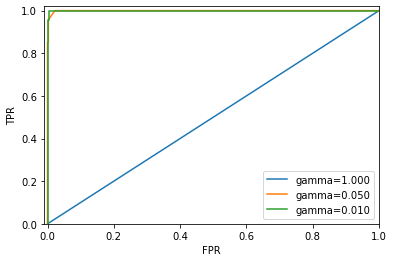

In [305]:
y = load_digits().target == 9

X_train, X_test, y_train, y_test = train_test_split(
    load_digits().data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
    gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

In [313]:
digits = load_digits()
X, y = (digits.data, digits.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

tree = DecisionTreeClassifier().fit(X_train, y_train)
svc = SVC().fit(X_train, y_train)
ran = RandomForestClassifier().fit(X_train, y_train)

clfs = [tree, svc, ran]

for clf in clfs:
    print('{:<25}: {}'.format(clf.__class__.__name__, clf.score(X_test, y_test)))

DecisionTreeClassifier   : 0.8466666666666667
SVC                      : 0.9911111111111112
RandomForestClassifier   : 0.9777777777777777


In [368]:
clf = tree

y_pred = clf.predict(X_test)
cmat = confusion_matrix(y_test, y_pred)
print(cmat)

[[34  0  0  0  1  0  0  0  0  2]
 [ 0 34  4  1  1  0  1  0  0  2]
 [ 1  0 37  3  1  0  0  0  2  0]
 [ 0  2  3 36  0  0  0  0  2  2]
 [ 1  2  0  0 33  0  0  1  0  1]
 [ 1  0  0  3  0 42  0  0  1  1]
 [ 0  1  0  0  0  0 49  0  1  1]
 [ 0  0  1  1  1  1  0 40  1  3]
 [ 0  1  1  5  0  0  0  0 40  1]
 [ 0  0  3  4  1  3  0  0  0 36]]


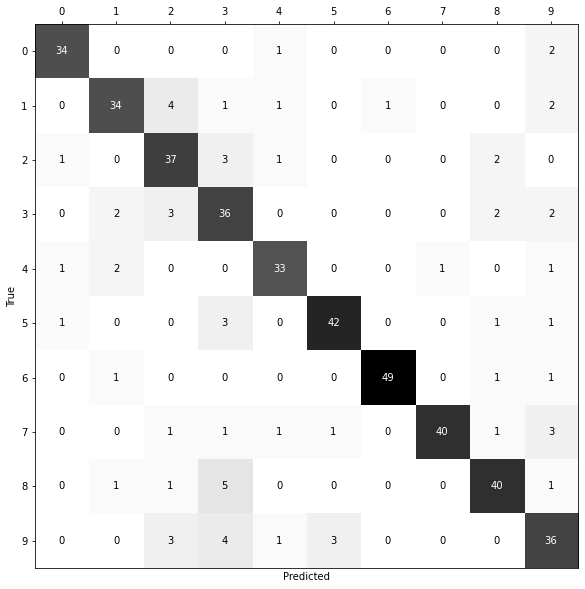

In [369]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_xticks([i for i in range(10)])
ax.set_yticks([i for i in range(10)])
ax.xaxis.set_ticks_position('top')
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
ax.imshow(cmat, cmap = 'gray_r')

for i in range(cmat.shape[0]):
    for j in range(cmat.shape[1]):
        ax.text(i, j, cmat[j, i], ha = 'center', va = 'center', color = 'white' if i == j else 'black')
        
plt.show()

In [371]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        37
           1       0.85      0.79      0.82        43
           2       0.76      0.84      0.80        44
           3       0.68      0.80      0.73        45
           4       0.87      0.87      0.87        38
           5       0.91      0.88      0.89        48
           6       0.98      0.94      0.96        52
           7       0.98      0.83      0.90        48
           8       0.85      0.83      0.84        48
           9       0.73      0.77      0.75        47

    accuracy                           0.85       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.85      0.85      0.85       450



In [404]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': range(1, 15),
         'max_leaf_nodes': range(10, 150, 10)}

gs = GridSearchCV(tree, param_grid = params, cv = 5).fit(X_train, y_train)

In [405]:
display(pd.DataFrame(gs.cv_results_))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002323,0.000304,0.000463,0.000050,1,10,"{'max_depth': 1, 'max_leaf_nodes': 10}",0.207407,0.203704,0.200743,0.200743,0.204461,0.203412,0.002506,183
1,0.002761,0.000943,0.000914,0.000896,1,20,"{'max_depth': 1, 'max_leaf_nodes': 20}",0.207407,0.203704,0.200743,0.200743,0.204461,0.203412,0.002506,183
2,0.002477,0.000791,0.000493,0.000196,1,30,"{'max_depth': 1, 'max_leaf_nodes': 30}",0.207407,0.203704,0.200743,0.200743,0.204461,0.203412,0.002506,183
3,0.001855,0.000154,0.000421,0.000105,1,40,"{'max_depth': 1, 'max_leaf_nodes': 40}",0.207407,0.203704,0.200743,0.200743,0.204461,0.203412,0.002506,183
4,0.001715,0.000168,0.000357,0.000092,1,50,"{'max_depth': 1, 'max_leaf_nodes': 50}",0.207407,0.203704,0.200743,0.200743,0.204461,0.203412,0.002506,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0.009440,0.000625,0.000290,0.000015,14,100,"{'max_depth': 14, 'max_leaf_nodes': 100}",0.859259,0.844444,0.851301,0.828996,0.825279,0.841856,0.012953,54
192,0.009296,0.000384,0.000289,0.000034,14,110,"{'max_depth': 14, 'max_leaf_nodes': 110}",0.866667,0.844444,0.840149,0.858736,0.836431,0.849285,0.011520,19
193,0.009466,0.000660,0.000300,0.000043,14,120,"{'max_depth': 14, 'max_leaf_nodes': 120}",0.859259,0.848148,0.851301,0.840149,0.847584,0.849288,0.006184,18
194,0.009430,0.000595,0.000297,0.000023,14,130,"{'max_depth': 14, 'max_leaf_nodes': 130}",0.866667,0.866667,0.858736,0.840149,0.847584,0.855960,0.010556,3


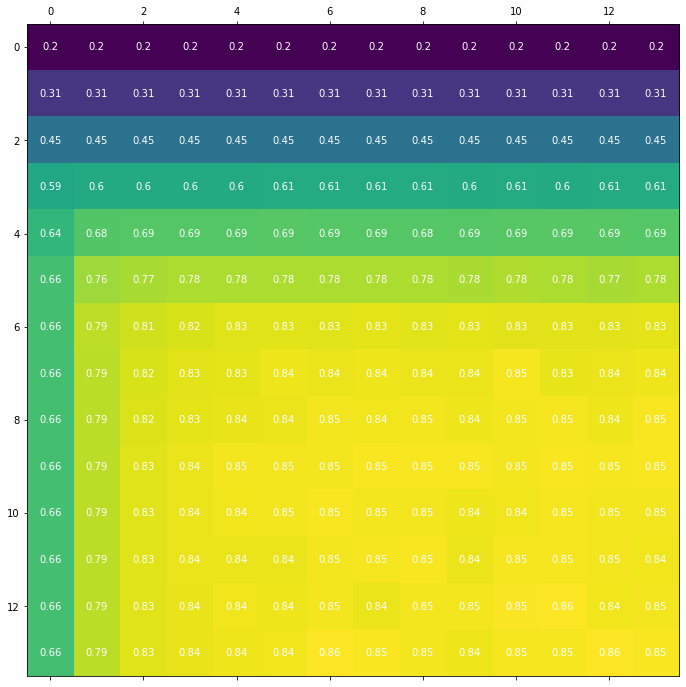

In [407]:
scores = gs.cv_results_['mean_test_score'].reshape(14, 14)

fig, ax = plt.subplots(figsize = (12, 12))

ax.matshow(scores)

for i in range(14):
    for j in range(14):
        ax.text(i, j, round(scores[j, i], 2), va = 'center', ha = 'center', color = 'white')
        
plt.show()

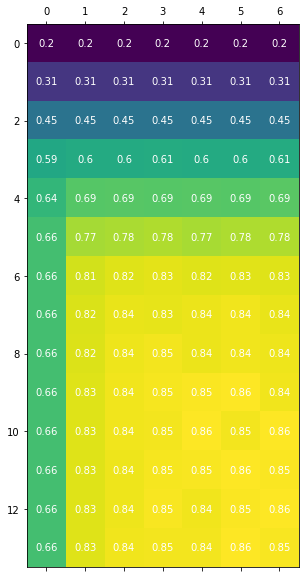

In [415]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': range(1, 15),
         'max_leaf_nodes': range(10, 150, 20)}

gs = GridSearchCV(tree, param_grid = params, cv = 5, scoring = None).fit(X_train, y_train)

scores = gs.cv_results_['mean_test_score'].reshape(14, 7)

fig, ax = plt.subplots(figsize = (10, 10))

ax.matshow(scores)

for i in range(7):
    for j in range(14):
        ax.text(i, j, round(scores[j, i], 2), va = 'center', ha = 'center', color = 'white')
        
plt.show()

In [421]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cross_val_score

params = {'max_depth': range(1, 15),
         'max_leaf_nodes': range(10, 150, 20)}

roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="roc_auc")
# print("AUC scoring: {}".format(roc_auc))

gs = GridSearchCV(tree, param_grid = params, cv = 5, scoring = 'roc_auc').fit(X_train, y_train)

scores = gs.cv_results_['mean_test_score'].reshape(14, 7)

fig, ax = plt.subplots(figsize = (10, 10))

ax.matshow(scores)

for i in range(7):
    for j in range(14):
        ax.text(i, j, round(scores[j, i], 2), va = 'center', ha = 'center', color = 'white')
        
plt.show()

ImportError: cannot import name 'cross_val_score' from 'sklearn.metrics' (/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)